<a href="https://colab.research.google.com/github/JINDOT/Data_Analysis_/blob/main/Online_Retail_Basic_and_Cohort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ONLINE RETAIL 을 이용한 기본 분석 및 cohort 분석

#### 실무에서 데이터를 어떻게 분석하는지 궁금해서 해보는 프로젝트

## 필요 라이브러리 설치

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

## 기본 기술 통계

### 데이터 불러오기

In [2]:
df = pd.read_csv("/content/drive/MyDrive/csv/online_retail.csv")

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### 기술 통계

In [5]:
# 상위 5개 목록 조회
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
# 하위 5개 목록 조회
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [7]:
# 열 타입 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [8]:
# 자료형 탐색
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [9]:
# 수치 타입의 기술 통계
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [10]:
# 범주 타입의 기술 통계 1
# 객체형(문자열) 데이터에 대한 통계
df.describe(include='object')

,InvoiceNo,StockCode,Description,InvoiceDate,Country
count,541909,541909,540455,541909,541909
unique,25900,4070,4223,23260,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2011-10-31 14:41:00,United Kingdom
freq,1114,2313,2369,1114,495478


In [11]:
# 범주 타입의 기술 통계 2
# 숫자형 데이터 타입을 제외한 모든 데이터 타입의 통계
df.describe(exclude='number')

,InvoiceNo,StockCode,Description,InvoiceDate,Country
count,541909,541909,540455,541909,541909
unique,25900,4070,4223,23260,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2011-10-31 14:41:00,United Kingdom
freq,1114,2313,2369,1114,495478



exclude='number' 가 좀 더 넓은 범위이다.


### 결측치

In [12]:
# 결측치 조회
# isnull() or isna()
df.isnull()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
541904,False,False,False,False,False,False,False,False
541905,False,False,False,False,False,False,False,False
541906,False,False,False,False,False,False,False,False
541907,False,False,False,False,False,False,False,False


In [13]:
# 보통 합계를 구해서 결측치를 본다.
# 결측치 True(= 1, 존재), False(= 0)를 합산
df.isnull().sum()

# 타이타닉과 우크라이나 러시아 전쟁 프로젝트를 하면서도
# 그냥 기계적으로 구했던 결측치 합계인데.. True를 1로 환산해서 계산했구나..

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [14]:
# 결측치 비율 조회
df.isnull().mean()

# or df.isnull().sum()/len(df)

InvoiceNo      0.000000
StockCode      0.000000
Description    0.002683
Quantity       0.000000
InvoiceDate    0.000000
UnitPrice      0.000000
CustomerID     0.249267
Country        0.000000
dtype: float64

<Axes: >

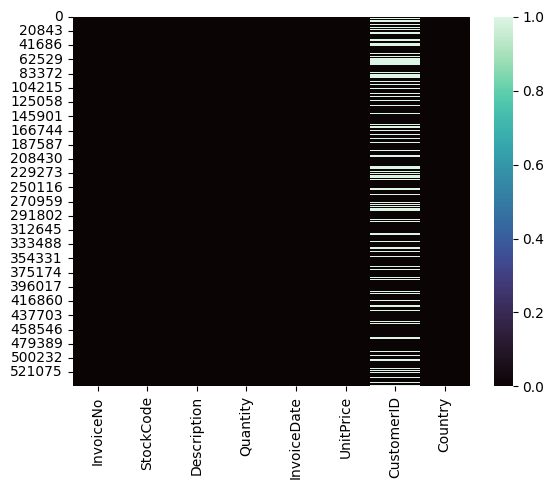

In [15]:
# 결측치 시각화
sns.heatmap(df.isnull(), cmap='mako')

### 전체 수치면수 시각화(히스토그램)

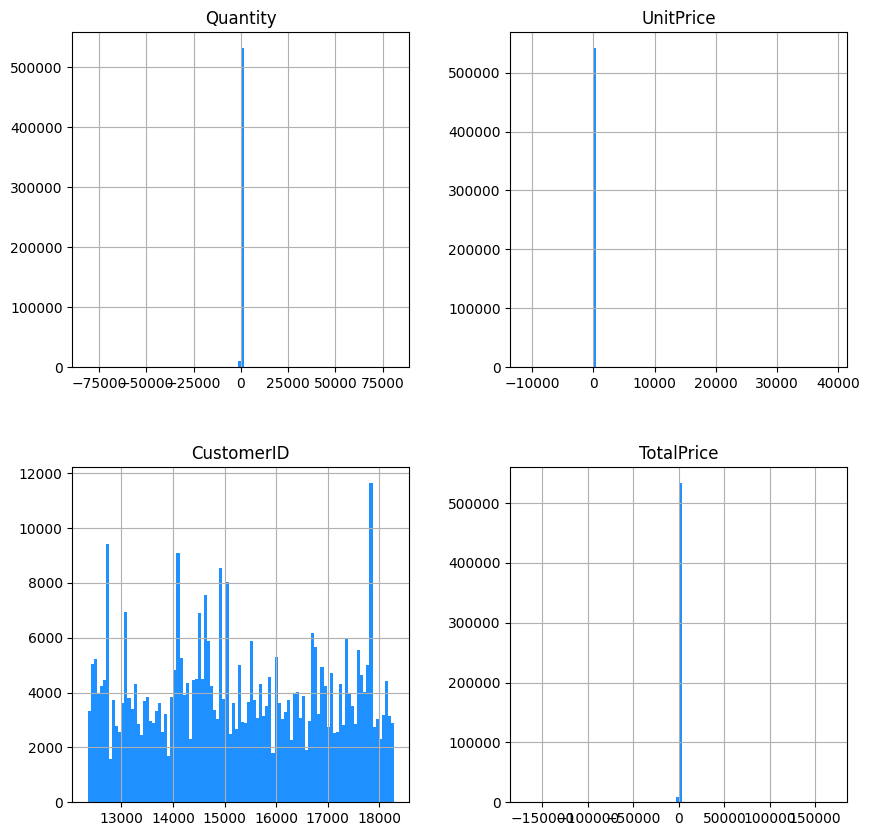

In [65]:
df.hist(figsize=(10,10), bins=100, color='dodgerblue');

### 전체 주문금액 파생변수 생성

In [17]:
# 전체 주문 금액 = 수량 * 금액
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


### 회원, 비회원 구매

**앞서 결측치 조회할 때, CustomerID 열에 결측치가 존재했었다. 이 결측치는 비회원일 확률이 높다.**

**이 데이터는 UK에서 가져왔으니 해당 국가에 비회원이 더 많을까? 아니면 다른 국가의 비회원 수가 많을까. 또는 회원 수 에 정비례한가? 에 대해 알아보자**


In [18]:
# CustomerID 값에 Null(= 비회원) 에 대한 country 값을 가져와 빈도수 구함
# 비회원 비율
df['CustomerID'].isnull().value_counts(1)

# False(= 회원)이 약 75% , True(= 비회원)이 약 25%

CustomerID
False    0.750733
True     0.249267
Name: proportion, dtype: float64

In [19]:
# 1. UK 국가에서 비회원이 더 많은가?
# Country 값을 가져와 빈도수 구함
# 조건값이 Country > loc 사용
df.loc[df['CustomerID'].notnull(), 'Country'].value_counts()

Country
United Kingdom          361878
Germany                   9495
France                    8491
EIRE                      7485
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1480
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     250
Unspecified                244
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45


In [20]:
df.loc[~df["CustomerID"].notnull(), "Country"].value_counts()

Country
United Kingdom    133600
EIRE                 711
Hong Kong            288
Unspecified          202
Switzerland          125
France                66
Israel                47
Portugal              39
Bahrain                2
Name: count, dtype: int64

In [21]:
(df.loc[~df["CustomerID"].notnull(), "Country"].value_counts()) / (df.loc[df['CustomerID'].notnull(), 'Country'].value_counts())

Country
Australia                    NaN
Austria                      NaN
Bahrain                 0.117647
Belgium                      NaN
Brazil                       NaN
Canada                       NaN
Channel Islands              NaN
Cyprus                       NaN
Czech Republic               NaN
Denmark                      NaN
EIRE                    0.094990
European Community           NaN
Finland                      NaN
France                  0.007773
Germany                      NaN
Greece                       NaN
Hong Kong                    NaN
Iceland                      NaN
Israel                  0.188000
Italy                        NaN
Japan                        NaN
Lebanon                      NaN
Lithuania                    NaN
Malta                        NaN
Netherlands                  NaN
Norway                       NaN
Poland                       NaN
Portugal                0.026351
RSA                          NaN
Saudi Arabia                 NaN
Si

영국-이스라엘-바레인-... 순으로 비회원 비율이 많다.

In [22]:
# 회원가입 여부 컬럼 생성
df['isRegistered'] = df['CustomerID'].notnull()
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,isRegistered
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,True
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,True
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,True
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,True
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,True
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,True
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,True
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,True
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,True


In [23]:
# notnull()을 사용해서 컬럼을 생성
# True = 회원, False = 비회원 으로 구성
pd.crosstab(df['Country'], df['isRegistered']).sort_values(True, ascending=False)

isRegistered,False,True
Country,,
United Kingdom,133600,361878
Germany,0,9495
France,66,8491
EIRE,711,7485
Spain,0,2533
Netherlands,0,2371
Belgium,0,2069
Switzerland,125,1877
Portugal,39,1480


홍콩은 유일하게 비회원으로만 구매가 이루어졌다.

### 구매 취소 비율

In [24]:
# 고객별 구매 취소 비율을 찾기 위해서 isCancel 컬럼 생성
# Quantity가 0보다 작으면 True, 크다면 False
# 현 데이터에서는 취소건을 앞에 C를 붙여 표시
# 실제 데이터에서는 이와 같은 방식으로 하지 않는다.
# 보통 구매시간, 취소시간을 Fair 하여 생성

In [25]:
# 선행
# InvoiceCode 생성
df["InvoiceCode"] = df["InvoiceNo"].str.replace("[0-9]","",regex=True)
df["InvoiceCode"].value_counts()

InvoiceCode
     532618
C      9288
A         3
Name: count, dtype: int64

In [26]:
# isCancel 생성
# 여기서 런타임이 계속 끊김..
df["isCancel"] = (df["InvoiceCode"]=="C")
df["isCancel"].head()

0    False
1    False
2    False
3    False
4    False
Name: isCancel, dtype: bool

In [27]:
# 취소 비율
pd.crosstab(df['isRegistered'], df['InvoiceCode'])

InvoiceCode,,A,C
isRegistered,,,
False,134694,3,383
True,397924,0,8905


In [28]:
# 고객별 구매 취소 비율 1 (Crosstab)
pd.crosstab(df['CustomerID'], df['isCancel'])

isCancel,False,True
CustomerID,,
12346.0,1,1
12347.0,182,0
12348.0,31,0
12349.0,73,0
12350.0,17,0
...,...,...
18280.0,10,0
18281.0,7,0
18282.0,12,1


In [29]:
# 고객별 구매 취소 비율 2 (Group by)
df.groupby(['CustomerID', 'isCancel'])['InvoiceNo'].count().unstack()

isCancel,False,True
CustomerID,,
12346.0,1.0,1.0
12347.0,182.0,NaN
12348.0,31.0,NaN
12349.0,73.0,NaN
12350.0,17.0,NaN
...,...,...
18280.0,10.0,NaN
18281.0,7.0,NaN
18282.0,12.0,1.0


In [30]:
# 고객별 구매 취소 비율 상위 10개
# 기준 : CustomerID
customer_cancel = pd.crosstab(df['CustomerID'], df['isCancel'])
customer_cancel.columns = ['확정', '취소'] # Columns Name
customer_cancel['취소율'] = customer_cancel['취소'] / customer_cancel['확정'] * 100

customer_cancel.nlargest(10, '취소율')
# inf(= infinity) 0 나눌 수 없는 값.

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,확정,취소,취소율
CustomerID,,,
12503.0,0,1,inf
12505.0,0,1,inf
12605.0,0,3,inf
12666.0,0,2,inf
12870.0,0,2,inf
12943.0,0,1,inf
13154.0,0,1,inf
13693.0,0,4,inf
13829.0,0,1,inf


In [31]:
# 고객별 구매 취소 빈도수 상위 10개(Customer ID)
customer_cancel.nlargest(10, '취소')

,확정,취소,취소율
CustomerID,,,
14911.0,5677,226,3.980976
17841.0,7847,136,1.733146
17511.0,963,113,11.734164
15311.0,2379,112,4.707860
12607.0,101,101,100.000000
14410.0,194,93,47.938144
13798.0,349,90,25.787966
14606.0,2700,82,3.037037
13113.0,201,79,39.303483


In [32]:
# 취소건 조회
df[df['isCancel'] == True]
# or
# df[df['InvoiceCode'] == 'C']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,isRegistered,InvoiceCode,isCancel
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,-27.50,True,C,True
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,-4.65,True,C,True
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-19.80,True,C,True
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96,True,C,True
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96,True,C,True
...,...,...,...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,-9.13,True,C,True
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,-224.69,True,C,True
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,-54.75,True,C,True
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,-1.25,True,C,True


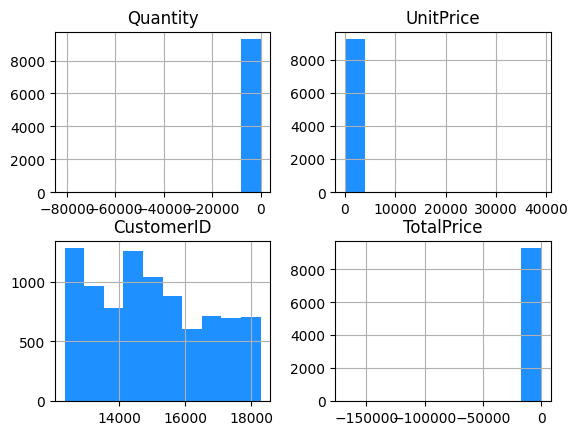

In [64]:
# 취소건 히스토그램
df[df['isCancel'] == True].hist(color='dodgerblue');

In [34]:
# 특정 고객의 취소 조회
# 취소율 100% 고객 : 12607.0
# 특정 고객의 구매 및 취소 품목 조회
df[df['CustomerID'] == 12607.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,isRegistered,InvoiceCode,isCancel
389350,570467,22551,PLASTERS IN TIN SPACEBOY,12,2011-10-10 16:06:00,1.65,12607.0,USA,19.80,True,,False
389351,570467,21915,RED HARMONICA IN BOX,12,2011-10-10 16:06:00,1.25,12607.0,USA,15.00,True,,False
389352,570467,22619,SET OF 6 SOLDIER SKITTLES,4,2011-10-10 16:06:00,3.75,12607.0,USA,15.00,True,,False
389353,570467,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-10-10 16:06:00,4.95,12607.0,USA,14.85,True,,False
389354,570467,21524,DOORMAT SPOTTY HOME SWEET HOME,2,2011-10-10 16:06:00,8.25,12607.0,USA,16.50,True,,False
...,...,...,...,...,...,...,...,...,...,...,...,...
394091,C570867,23293,SET OF 12 FAIRY CAKE BAKING CASES,-8,2011-10-12 16:17:00,0.83,12607.0,USA,-6.64,True,C,True
394092,C570867,23292,SPACEBOY CHILDRENS CUP,-8,2011-10-12 16:17:00,1.25,12607.0,USA,-10.00,True,C,True
394093,C570867,23291,DOLLY GIRL CHILDRENS CUP,-8,2011-10-12 16:17:00,1.25,12607.0,USA,-10.00,True,C,True
394094,C570867,23513,EMBROIDERED RIBBON REEL SUSIE,-6,2011-10-12 16:17:00,2.08,12607.0,USA,-12.48,True,C,True


In [35]:
# 특정 고객의 취소 품목 확인
df[(df['CustomerID'] == 12607.0) & (df['InvoiceCode'] == 'C')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,isRegistered,InvoiceCode,isCancel
393995,C570867,23290,SPACEBOY CHILDRENS BOWL,-8,2011-10-12 16:17:00,1.25,12607.0,USA,-10.00,True,C,True
393996,C570867,23289,DOLLY GIRL CHILDRENS BOWL,-8,2011-10-12 16:17:00,1.25,12607.0,USA,-10.00,True,C,True
393997,C570867,23256,CHILDRENS CUTLERY SPACEBOY,-4,2011-10-12 16:17:00,4.15,12607.0,USA,-16.60,True,C,True
393998,C570867,23255,CHILDRENS CUTLERY CIRCUS PARADE,-4,2011-10-12 16:17:00,4.15,12607.0,USA,-16.60,True,C,True
393999,C570867,23254,CHILDRENS CUTLERY DOLLY GIRL,-4,2011-10-12 16:17:00,4.15,12607.0,USA,-16.60,True,C,True
...,...,...,...,...,...,...,...,...,...,...,...,...
394091,C570867,23293,SET OF 12 FAIRY CAKE BAKING CASES,-8,2011-10-12 16:17:00,0.83,12607.0,USA,-6.64,True,C,True
394092,C570867,23292,SPACEBOY CHILDRENS CUP,-8,2011-10-12 16:17:00,1.25,12607.0,USA,-10.00,True,C,True
394093,C570867,23291,DOLLY GIRL CHILDRENS CUP,-8,2011-10-12 16:17:00,1.25,12607.0,USA,-10.00,True,C,True
394094,C570867,23513,EMBROIDERED RIBBON REEL SUSIE,-6,2011-10-12 16:17:00,2.08,12607.0,USA,-12.48,True,C,True


### 제품별 구매 취소 비율

In [36]:
# Stock Cancel 생성
stock_cancel = pd.crosstab(df['StockCode'], df['isCancel'])

In [37]:
pd.crosstab(df['Description'], df['isCancel'])

isCancel,False,True
Description,,
4 PURPLE FLOCK DINNER CANDLES,41,0
50'S CHRISTMAS GIFT BAG LARGE,129,1
DOLLY GIRL BEAKER,179,2
I LOVE LONDON MINI BACKPACK,88,0
I LOVE LONDON MINI RUCKSACK,1,0
...,...,...
wrongly marked carton 22804,1,0
wrongly marked. 23343 in box,1,0
wrongly sold (22719) barcode,1,0


In [38]:
# Description 값을 연산에 사용하지 않고 나중에 추가하는 방법
# drop_duplicates() : 중복제거
# set_index('StockCode') : Index 값으로 변경
df_stock_desc = df[['StockCode', 'Description']].drop_duplicates().set_index('StockCode')
df_stock_desc

,Description
StockCode,
85123A,WHITE HANGING HEART T-LIGHT HOLDER
71053,WHITE METAL LANTERN
84406B,CREAM CUPID HEARTS COAT HANGER
84029G,KNITTED UNION FLAG HOT WATER BOTTLE
84029E,RED WOOLLY HOTTIE WHITE HEART.
...,...
47591b,SCOTTIES CHILDRENS APRON
85123A,CREAM HANGING HEART T-LIGHT HOLDER
85175,NaN


In [39]:
# 중복 확인 (1528 rows)
df_stock_desc[df_stock_desc.duplicated()]

,Description
StockCode,
82613C,"METAL SIGN,CUPCAKE SINGLE HOOK"
21134,NaN
22145,NaN
37509,NaN
85226A,NaN
...,...
22576,check
23090,missing
47591b,SCOTTIES CHILDRENS APRON


In [40]:
# 중복 제거 및 결측치 제거
df_stock_desc = df[['StockCode', 'Description']].drop_duplicates('StockCode').set_index('StockCode').dropna()
df_stock_desc

,Description
StockCode,
85123A,WHITE HANGING HEART T-LIGHT HOLDER
71053,WHITE METAL LANTERN
84406B,CREAM CUPID HEARTS COAT HANGER
84029G,KNITTED UNION FLAG HOT WATER BOTTLE
84029E,RED WOOLLY HOTTIE WHITE HEART.
...,...
85179a,GREEN BITTY LIGHT CHAIN
23617,SET 10 CARDS SWIRLY XMAS TREE 17104
90214U,"LETTER ""U"" BLING KEY RING"


In [41]:
# stock_cancel
# merge, join, columns
# stock_cancel.merge(df_stock_desc, left_index=True, right_index=True)
# stock_cancel.join(df_stock_desc)
stock_cancel["Desc"] = df_stock_desc["Description"]
stock_cancel

isCancel,False,True,Desc
StockCode,,,
10002,73,0,INFLATABLE POLITICAL GLOBE
10080,24,0,GROOVY CACTUS INFLATABLE
10120,30,0,DOGGY RUBBER
10123C,4,0,HEARTS WRAPPING TAPE
10123G,1,0,NaN
...,...,...,...
gift_0001_20,10,0,Dotcomgiftshop Gift Voucher £20.00
gift_0001_30,8,0,Dotcomgiftshop Gift Voucher £30.00
gift_0001_40,3,0,Dotcomgiftshop Gift Voucher £40.00


In [42]:
# stock_cancel columns name 변경
stock_cancel.columns = ['확정', '취소', '상세']
stock_cancel.nlargest(10, '취소')

,확정,취소,상세
StockCode,,,
M,327,244,Manual
22423,2022,181,REGENCY CAKESTAND 3 TIER
POST,1130,126,POSTAGE
22960,1142,87,JAM MAKING SET WITH JARS
D,0,77,Discount
22720,1403,74,SET OF 3 CAKE TINS PANTRY DESIGN
21232,843,61,STRAWBERRY CERAMIC TRINKET BOX
S,2,61,SAMPLES
22699,1084,54,ROSES REGENCY TEACUP AND SAUCER


## 월, 일, 요일, 시간별 분석

### 선행작업
>

In [43]:
# 취소와 취소에 대한 본 주문건 제거
# 고객 ID가 없는 데이터 제거

In [44]:
df.shape

(541909, 12)

In [45]:
# Customer ID 가 있고(= Not Null)
# Quantity, UnitPrice가 0보다 큰 데이터
# 유효 데이터를 df_valid 변수에 할당
# InvoiceNo 가 숫자인 것(= 취소건 제외)
df.loc[(df['CustomerID'].notnull()) & (df['Quantity']>0) & (df['UnitPrice']>0), 'InvoiceCode']

0          
1          
2          
3          
4          
         ..
541904     
541905     
541906     
541907     
541908     
Name: InvoiceCode, Length: 397884, dtype: object

In [46]:
# df_valid
df_valid = df.loc[(df['CustomerID'].notnull()) & (df['Quantity']>0) & (df['UnitPrice']>0)].copy()
df_valid

# copy()
# 원본 데이터를 유지한 채로 새로운 변수를 생성하여 사용
# 원본 데이터에 영향 X

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,isRegistered,InvoiceCode,isCancel
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,True,,False
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,True,,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,True,,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,True,,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,True,,False
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,True,,False
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,True,,False
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,True,,False
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,True,,False


In [47]:
# 비교
df.shape, df_valid.shape

((541909, 12), (397884, 12))

In [48]:
# Customer ID 없는 건 제거
# 중복 데이터 제거
df_valid = df_valid.drop_duplicates().copy()
df_valid

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,isRegistered,InvoiceCode,isCancel
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,True,,False
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,True,,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,True,,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,True,,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,True,,False
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,True,,False
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,True,,False
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,True,,False
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,True,,False


### 연도, 월별

In [49]:
# InvoiceDate를 Datatime 모듈을 통해 날짜 형식으로 변환
df_valid['InvoiceDate'].head()

0    2010-12-01 08:26:00
1    2010-12-01 08:26:00
2    2010-12-01 08:26:00
3    2010-12-01 08:26:00
4    2010-12-01 08:26:00
Name: InvoiceDate, dtype: object

In [50]:
df_valid['InvoiceDate'] = pd.to_datetime(df_valid['InvoiceDate'])
df_valid['InvoiceDate'].head()

0   2010-12-01 08:26:00
1   2010-12-01 08:26:00
2   2010-12-01 08:26:00
3   2010-12-01 08:26:00
4   2010-12-01 08:26:00
Name: InvoiceDate, dtype: datetime64[ns]

In [51]:
# year, month, day, dayofweek를 InvoiceDate에서 추출하여 파생변수 생성
df_valid['InvoiceYear'] = df_valid['InvoiceDate'].dt.year
df_valid['InvoiceMonth'] = df_valid['InvoiceDate'].dt.month
df_valid['InvoiceDay'] = df_valid['InvoiceDate'].dt.day
df_valid['InvoiceDow'] = df_valid['InvoiceDate'].dt.dayofweek
df_valid

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,isRegistered,InvoiceCode,isCancel,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceDow
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,True,,False,2010,12,1,2
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,True,,False,2010,12,1,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,True,,False,2010,12,1,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,True,,False,2010,12,1,2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,True,,False,2010,12,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,True,,False,2011,12,9,4
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,True,,False,2011,12,9,4
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,True,,False,2011,12,9,4
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,True,,False,2011,12,9,4


In [52]:
# year, month 따로 추출
# InvoiceDate 에서 앞에 7개의 문자 가져오기 [:7]
df_valid['InvoiceYM'] = df_valid['InvoiceDate'].astype(str).str[:7]
df_valid[['InvoiceDate', 'InvoiceYM']].sample(3)

,InvoiceDate,InvoiceYM
325316,2011-09-04 13:45:00,2011-09
135644,2011-03-28 12:13:00,2011-03
244472,2011-06-30 11:49:00,2011-06


In [53]:
# time, hour 추출
df_valid['InvoiceTime'] = df_valid['InvoiceDate'].dt.time
df_valid['InvoiceHour'] = df_valid['InvoiceDate'].dt.hour
df_valid.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,isRegistered,InvoiceCode,isCancel,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceDow,InvoiceYM,InvoiceTime,InvoiceHour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,True,,False,2010,12,1,2,2010-12,08:26:00,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,True,,False,2010,12,1,2,2010-12,08:26:00,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,True,,False,2010,12,1,2,2010-12,08:26:00,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,True,,False,2010,12,1,2,2010-12,08:26:00,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,True,,False,2010,12,1,2,2010-12,08:26:00,8


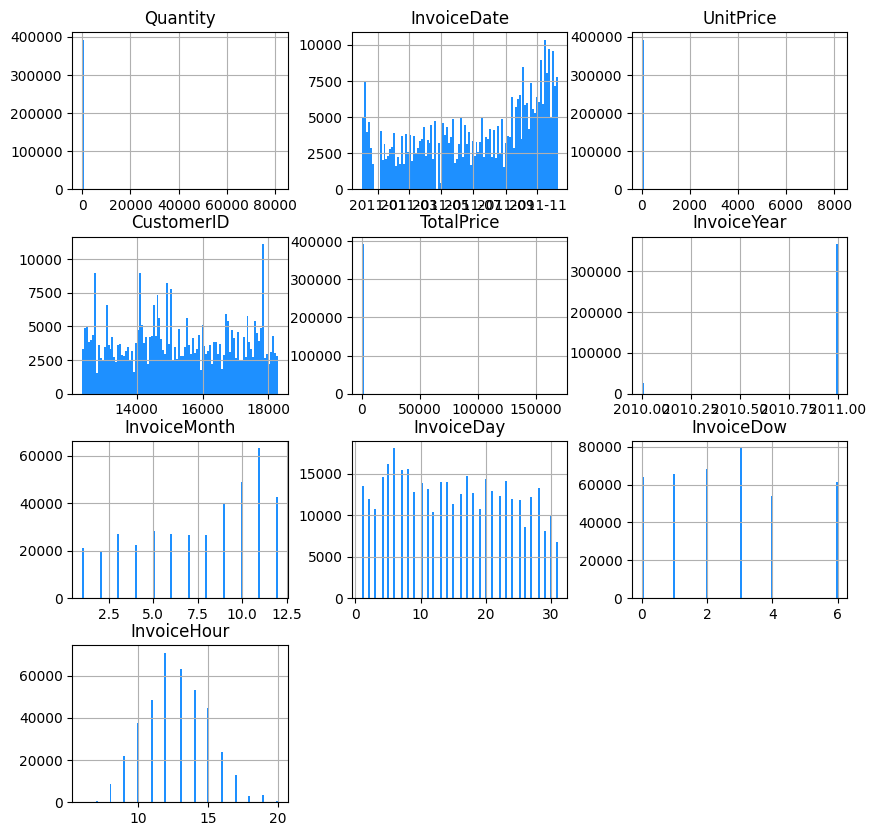

In [63]:
# df_valid 히스토그램
df_valid.hist(figsize=(10,10), bins=100, color='dodgerblue');

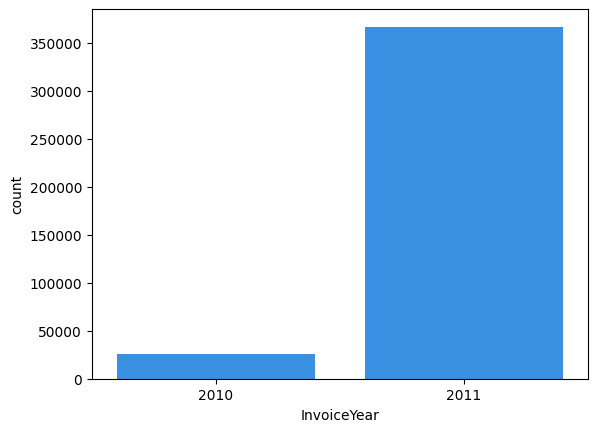

In [62]:
# Countplot , 연도별 구매 빈도수 시각화
sns.countplot(data=df_valid, x='InvoiceYear', color='dodgerblue');

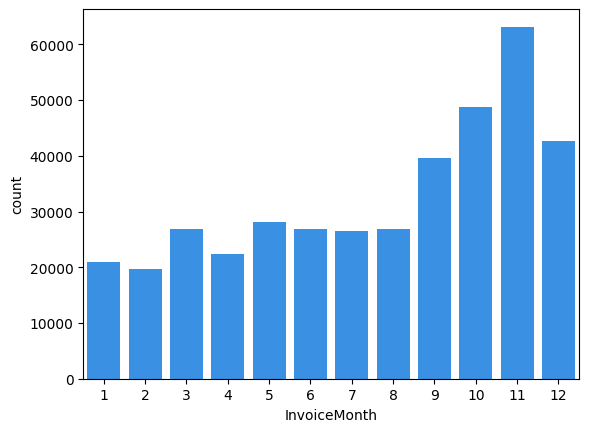

In [61]:
# 월별 구매 빈도수 시각화
sns.countplot(data=df_valid, x='InvoiceMonth', color='dodgerblue');

<ipython-input-66-a6481d7d795f>:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:dodgerblue'` for the same effect.

  sns.countplot(data=df_valid, x='InvoiceMonth', hue='InvoiceYear', color='dodgerblue');


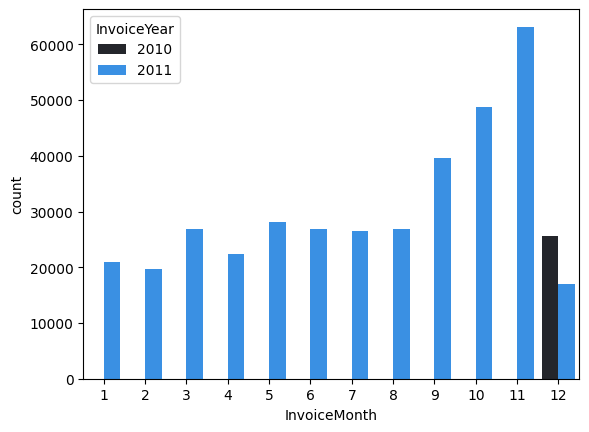

In [66]:
# 연도, 월별 구매 빈도수 시각화
sns.countplot(data=df_valid, x='InvoiceMonth', hue='InvoiceYear', color='dodgerblue');

### 요일

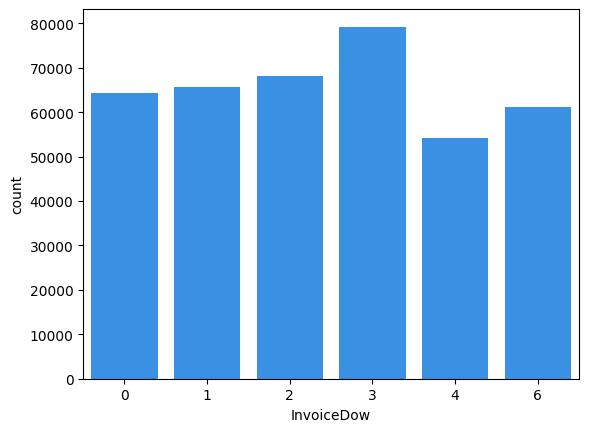

In [67]:
# Countplot, 요일별 구매 빈도수 시각화
sns.countplot(data=df_valid, x='InvoiceDow', color='dodgerblue');

In [68]:
# 요일별 구매와 취소 빈도수 시각화
# hue 옵션을 사용하면 특정 컬럼을 지정해서 표기 가능
# hue = 'Cancel'
# sns.countplot(data=df_valid, x='InvoiceDow', hue='isCancel');

In [69]:
# List Comprehension
# 월 ~ 일 요일 문자열 리스트 생성
day_name = ['월', '화', '수', '목', '금', '토', '일']
day_name_eng = [w for w in '월화수목금토일']

# 한국어 요일을 영어 요일로 매핑
kor_to_eng = {
    '월': 'Mon',
    '화': 'Tue',
    '수': 'Wed',
    '목': 'Thu',
    '금': 'Fri',
    '토': 'Sat',
    '일': 'Sun'
}

# 변환된 리스트
day_name_eng = [kor_to_eng[day] for day in day_name]
day_name_eng

# 왜 그런지 모르겠지만 한글이 깨지고 여러 방법을 써봤지만 안됨..ㅠ
# 다른 파일에서 적용예정

['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [70]:
# 토요일 은 데이터가 없으므로 삭제
# 다음 단계에서 index 길이가 맞지 않아 에러 발생
day_name_eng.remove('Sat')
day_name_eng

['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sun']

In [71]:
# Value_counts를 이용해 요일별 구매 빈도수 구함
dow_count = df_valid['InvoiceDow'].value_counts().sort_index()

In [72]:
# Index 요일로 변경
dow_count.index = day_name_eng
dow_count

Mon    64231
Tue    65744
Wed    68040
Thu    79243
Fri    54222
Sun    61212
Name: count, dtype: int64

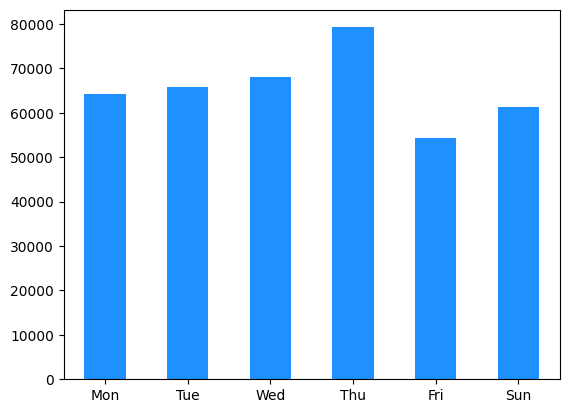

In [74]:
# plot bar, 시각화
# rot=0 : 글씨 수평
dow_count.plot.bar(color='dodgerblue', rot=0);

In [75]:
# 파생변수 사용 (!= List Comprehension)
# order=list('월화수목금토일') 요일별 정렬
# df_valid['InvoiceDayName'] = df_valid['InvoiceDow'].map(lambda x :"월화수목금토일"[x])
# sns.countplot(data=df_valid, x='InvoiceDayName', order=list('월화수목금토일'))

### 시간

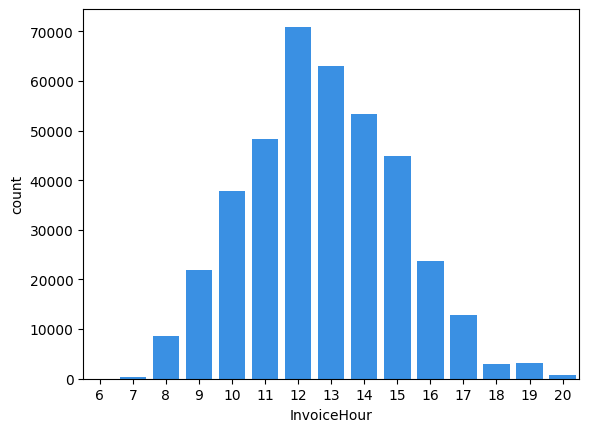

In [76]:
# 시간대 구매 빈도수 시각화
sns.countplot(data=df_valid, x='InvoiceHour', color='dodgerblue');

Text(0.5, 1.0, 'Order by Time')

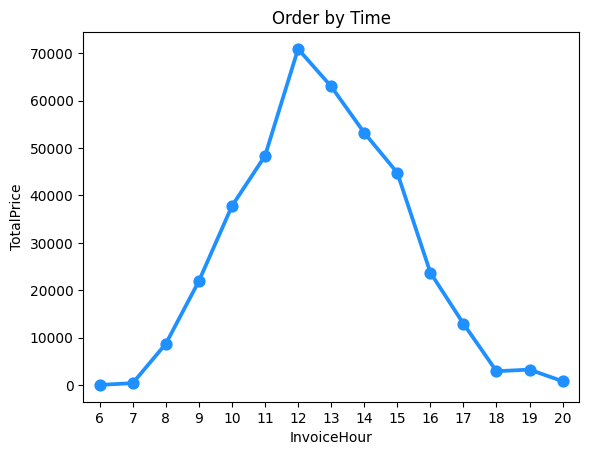

In [78]:
# Pointtplot으로  시간대별 구매 빈도수 시각화
# estimator : x 값에 대해 데이터를 집계하는 데 사용되는 함수를 지정
# 시간대별로 발생한 청구서의 개수 (시간대에 얼마나 많은 거래가 있었는지)
sns.pointplot(data=df_valid, x='InvoiceHour',y="TotalPrice", estimator=len,  errorbar=None, color='dodgerblue').set_title('Order by Time')

Text(0.5, 1.0, 'Revenue by Time')

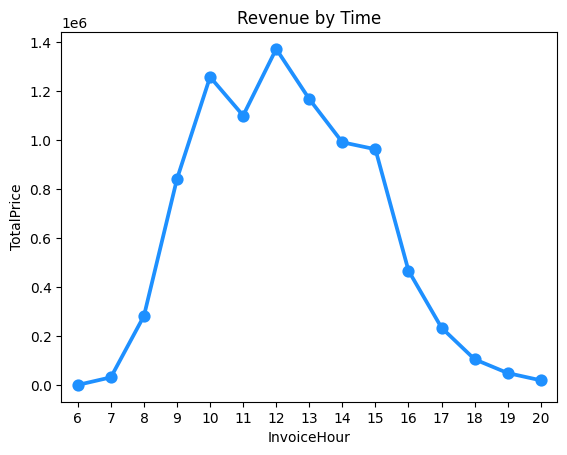

In [79]:
# 시간대별로 발생한 총 매출액을 나타냄 (시간대에 얼마나 많은 매출이 있었는지)
sns.pointplot(data=df_valid, x='InvoiceHour',y="TotalPrice", estimator=sum,  errorbar=None, color='dodgerblue').set_title('Revenue by Time')

In [80]:
# 시간 - 요일별 빈도수
# hour_dow
hour_dow = pd.crosstab(df_valid['InvoiceHour'], df_valid['InvoiceDow'])
hour_dow

InvoiceDow,0,1,2,3,4,6
InvoiceHour,,,,,,
6,0,0,0,1,0,0
7,61,65,59,64,130,0
8,1563,1710,1818,1763,1833,0
9,4345,4542,4078,4569,4368,25
10,6106,6575,6927,7528,7161,3476
11,7401,8418,8292,7134,7189,9931
12,10585,11903,12684,12908,9765,13093
13,10459,10274,11137,11446,8300,11403
14,9119,9428,8716,9173,7227,9588


In [81]:
# 월~일 순서대로 정렬
# hour_dow = hour_dow[list('월화수목금토일')]
# hour_dow
# 미치겠네 한글 222

In [82]:
# hour_dow background_gradient
# hour_dow
# axis=0 : 행 기준
# axis=1 : 열 기준
# axis=None : 전체 기준
hour_dow.style.background_gradient(axis=0)

InvoiceDow,0,1,2,3,4,6
InvoiceHour,,,,,,
6,0,0,0,1,0,0
7,61,65,59,64,130,0
8,1563,1710,1818,1763,1833,0
9,4345,4542,4078,4569,4368,25
10,6106,6575,6927,7528,7161,3476
11,7401,8418,8292,7134,7189,9931
12,10585,11903,12684,12908,9765,13093
13,10459,10274,11137,11446,8300,11403
14,9119,9428,8716,9173,7227,9588


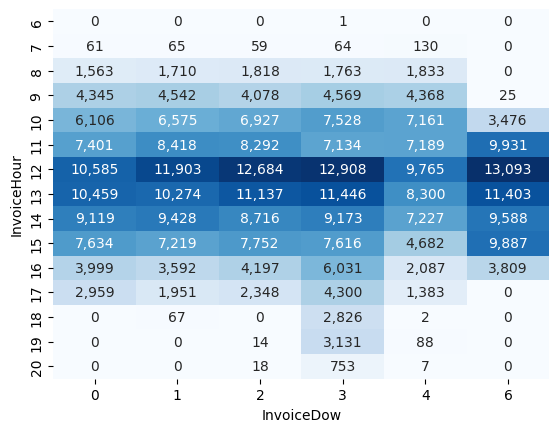

In [88]:
# 시간 - 요일별 구매 주문 시각화
# heatmap
sns.heatmap(hour_dow, cmap='Blues', annot=True, fmt=',.0f', cbar=False);

<Axes: xlabel='InvoiceHour'>

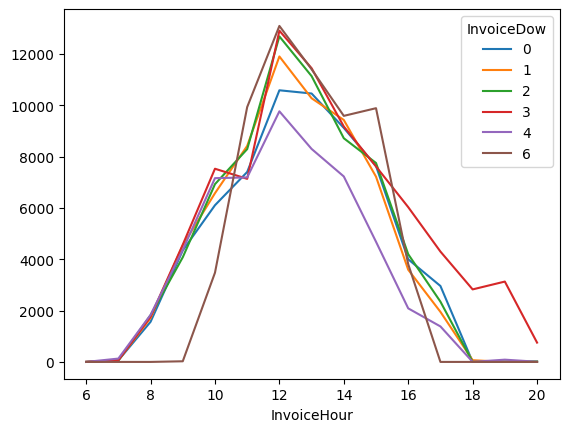

In [89]:
# 시간 - 요일별 구매 주문 시각화
# subplot
hour_dow.plot()

array([<Axes: xlabel='InvoiceHour'>, <Axes: xlabel='InvoiceHour'>,
       <Axes: xlabel='InvoiceHour'>, <Axes: xlabel='InvoiceHour'>,
       <Axes: xlabel='InvoiceHour'>, <Axes: xlabel='InvoiceHour'>],
      dtype=object)

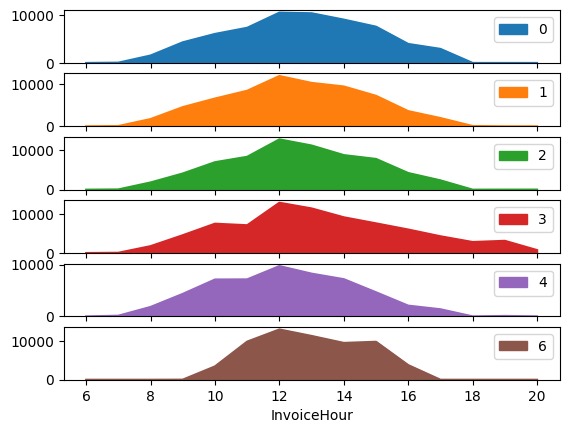

In [90]:
# 시간 - 요일별 구매 주문 시각화
# area plot
hour_dow.plot(subplots=True, kind='area')

## 고객 관점 분석

### ARPU & ARPPU

**ARPU(Average Revenue Per User)**
>가입한 서비스에 대해 가입자 1명이 특정 기간 동안 지출한 평균 금액

>ARPU = 매출 / 중복을 제외한 순수 활동 사용자 수

**ARPPU(Average Revenue Per Paying User)**
> 지불 유저 1명 당 한 달에 결제하는 평균 금액을 산정한 수치

In [91]:
# ARPPU, Customer ID 를 사용할 때는 count가 아닌 nuique 사용
arppu = df_valid.groupby(['InvoiceYM']).agg({'TotalPrice':'sum', 'CustomerID':'nunique'})
arppu['ARPPU'] = arppu['TotalPrice'] / arppu['CustomerID']
arppu

,TotalPrice,CustomerID,ARPPU
InvoiceYM,,,
2010-12,570422.730,885,644.545458
2011-01,568101.310,741,766.668435
2011-02,446084.920,758,588.502533
2011-03,594081.760,974,609.940205
2011-04,468374.331,856,547.166275
2011-05,677355.150,1056,641.434801
2011-06,660046.050,991,666.040414
2011-07,598962.901,949,631.151634
2011-08,644051.040,935,688.824642


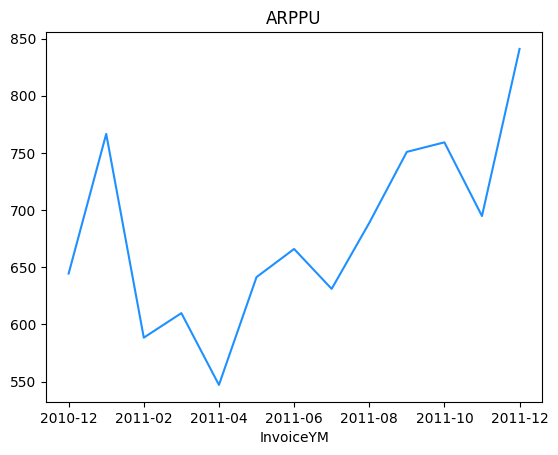

In [92]:
# ARPPU 시각화
arppu['ARPPU'].plot(title='ARPPU', color='dodgerblue');

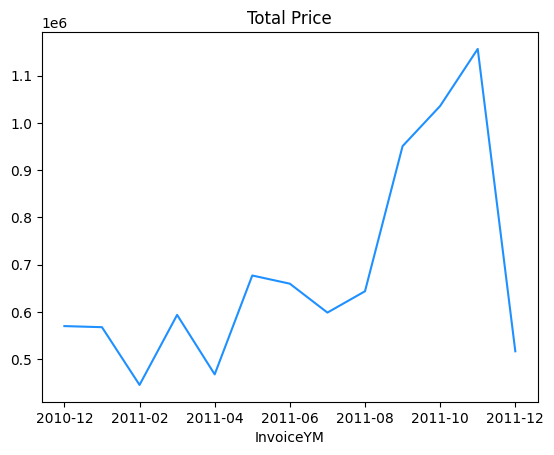

In [93]:
# 매출액 시각화
arppu['TotalPrice'].plot(title='Total Price', color='dodgerblue');

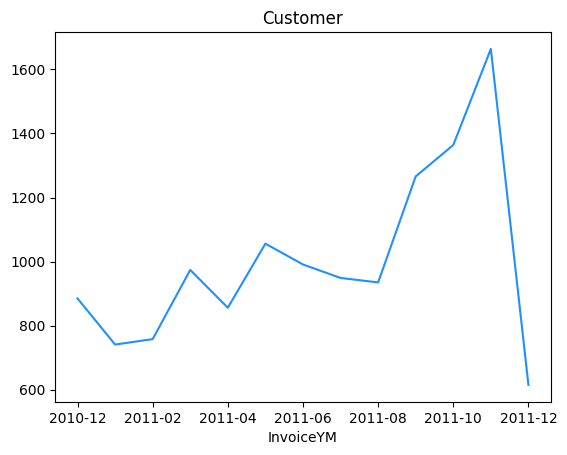

In [94]:
# Customer ID 시각화
arppu['CustomerID'].plot(title='Customer', color='dodgerblue');

In [95]:
# df_valid(유효고객, 유효주문)내 고객별(CustomerID) 구매(InvoiceNo) 빈도수를 구함
# 고객별 구매 빈도수, 평균 구매 금액, 총 구매 금액
cust_agg = df_valid.groupby('CustomerID').agg({'InvoiceNo':'nunique', 'TotalPrice':['mean','sum']})
cust_agg

InvoiceNo    TotalPrice          
             nunique          mean       sum
CustomerID                                  
12346.0            1  77183.600000  77183.60
12347.0            7     23.681319   4310.00
12348.0            4     57.975484   1797.24
12349.0            1     24.076027   1757.55
12350.0            1     19.670588    334.40
...              ...           ...       ...
18280.0            1     18.060000    180.60
18281.0            1     11.545714     80.82
18282.0            2     14.837500    178.05
18283.0           16      2.837074   2045.53
18287.0            3     26.246857   1837.28

[4338 rows x 3 columns]

In [96]:
# Customer ID 별 기술통계 값 확인
cust_agg.describe()

InvoiceNo    TotalPrice               
           nunique          mean            sum
count  4338.000000   4338.000000    4338.000000
mean      4.272015     68.381590    2048.688081
std       7.697998   1467.918294    8985.230220
min       1.000000      2.136970       3.750000
25%       1.000000     12.393196     306.482500
50%       2.000000     17.755000     668.570000
75%       5.000000     24.878950    1660.597500
max     209.000000  77183.600000  280206.020000

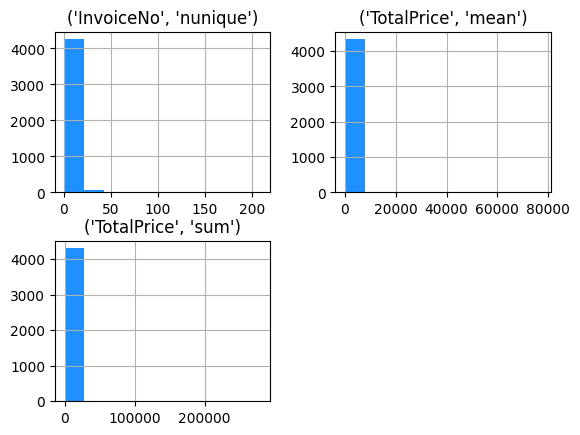

In [97]:
# 히스토그램
cust_agg.hist(color='dodgerblue');

### MAU(Monthly Active User)

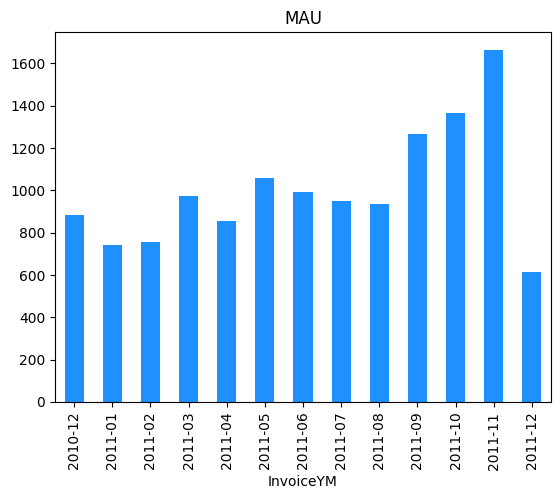

In [98]:
# InvoiceYM 으로 그룹화 하여 Customer ID 의 유일값의 갯수를 구함
MAU = df_valid.groupby('InvoiceYM')['CustomerID'].nunique()
MAU.plot.bar(title='MAU', color='dodgerblue');

### 월별, 주문건, 중복을 제외한 주문제품 종류 수, 고객 수, 총 주문금액

In [99]:
# df_valid(유효고객, 유효주문)에 대한 월별 데이터(InvoiceYM)을 확인
df_valid.groupby('InvoiceYM').agg ({'InvoiceNo':'count', 'StockCode':'nunique','CustomerID':'nunique', 'UnitPrice':'mean', 'Quantity':'sum', 'TotalPrice':'sum', 'TotalPrice':'mean'})

,InvoiceNo,StockCode,CustomerID,UnitPrice,Quantity,TotalPrice
InvoiceYM,,,,,,
2010-12,25670,2411,885,3.142953,311048,22.221376
2011-01,20988,2121,741,3.155834,348473,27.067911
2011-02,19706,2124,758,3.177686,265027,22.637010
2011-03,26870,2234,974,3.269996,347582,22.109481
2011-04,22433,2217,856,3.501247,291366,20.878809
2011-05,28073,2219,1056,3.615606,372864,24.128349
2011-06,26926,2339,991,3.142043,363014,24.513335
2011-07,26580,2351,949,2.838771,367360,22.534345
2011-08,26790,2356,935,2.944274,397373,24.040726


## Retension, Cohort Analysis

**User Retension 이란, 특정 기간 동안 활성화된 유저 혹은 고객의 수를 나타낸다. 보통 리텐션율 이라는 백분율을 통해서 표현한다.**
> 리텐션율 = (설정된 기간 끝의 활성 사용자 수 - 설정된 기간 동안의 신규 사용자 수)/ 기간 시작 시의 총 활성 사용자 수

**유저 리텐션과 유저 리텐션의 차이는 무엇인가?**
> 유저는 제품이나 서비스를 이용하는 사람, 고객은 제품이나 서비스에 가격을 지불하는 사람이다.
> 유저 리텐션은 제품을 사용하는 사람, 고객 리텐션은 제품을 결제하는 고객 수를 측정한다.

**이탈 테이블**
> 이탈 집단은 유지 테이블의 역버전이며 시간 경과에 따라 집단에 대한 반환 기준을 충족하지 않은 방문자를 표시한다.
최대 3개의 지표와 10개의 세그먼트를 포함

**지연 테이블**
> 포함 이벤트가 발생한 이전 및 이후에 경과한 시간을 측정한다. 이는 이전/이후 분석을 위한 도구이다. 포함 열은 테이블 중앙에 있으며 포함 이벤트 전후의 기간이 양쪽에 표시된다

### 선행작업

In [100]:
# '최근 구매일 - 최초 구매일'로 첫 구매 후 몇 달 후에 구매인지를 알 수 있다.
# 최초 구매일(InvoiceDateFirst) = InvoiceDate을 월단위로 리텐션
df_valid['InvoiceDateFirst'] = df_valid.groupby(['CustomerID'])['InvoiceDate'].transform('min')

In [101]:
df_valid[['CustomerID','InvoiceDate', 'InvoiceDateFirst']].sample(3)
# 차례로 고객ID, 구매한 날짜, 해당 고객이 처음 구매한 날

,CustomerID,InvoiceDate,InvoiceDateFirst
413330,14432.0,2011-10-23 15:29:00,2011-09-11 14:09:00
366531,16909.0,2011-09-28 16:45:00,2011-09-28 16:45:00
383195,12477.0,2011-10-07 09:16:00,2011-02-11 12:45:00


### 첫 구매일부터 몇 달째 구매인가

In [102]:
# 연도별 차이(year_diff)와 월별 차이(month_diff)
# 연도별 차이
year_diff = df_valid['InvoiceDate'].dt.year - df_valid['InvoiceDateFirst'].dt.year
year_diff.value_counts()

0    251153
1    141539
Name: count, dtype: int64

1이 존재하는 이유는 'InvoiceDate'와 'InvoiceDateFirst'가 서로 다른 연도에 있을 때 생긴다.

여기서는 10년도 12월과 11년도 12월일 경우이다.

In [103]:
# 월별 차이
month_diff = df_valid['InvoiceDate'].dt.month - df_valid['InvoiceDateFirst'].dt.month
month_diff.value_counts()

 0     124030
-1      21677
 2      18038
 1      17405
 3      15872
 4      15537
 5      14727
-3      14098
-2      13399
 6      12393
 7      11986
-7      11946
 8      11435
-4      11316
-5      11312
-9      11121
-6      11069
-11     10111
-8       9628
 9       8870
-10      8689
 10      6699
 11      1334
Name: count, dtype: int64

음수 index 역시 연도 차이가 원인이다.

InvoiceDate 가 11년 2월이고 InvoiceDateFirst가 10년 12월이면 차이는 -10으로 음수값이 나온다.

In [104]:
# 첫 구매 후 몇달 후 구매인가?
# 연도차이 * 12(개월) + 월차이 + 1
# 10년 12월 - 11년 12월 , Cohort Index 변수의 최소값은 1 이고, 최대값은 13 이다.
df_valid['CohortIndex'] = (year_diff * 12) + month_diff + 1
df_valid[['CustomerID', 'InvoiceDate', 'InvoiceDateFirst', 'CohortIndex']].sample(3)

,CustomerID,InvoiceDate,InvoiceDateFirst,CohortIndex
406368,13849.0,2011-10-19 10:59:00,2011-06-22 10:11:00,5
165863,13534.0,2011-04-21 10:29:00,2010-12-16 15:23:00,5
383475,13876.0,2011-10-07 10:22:00,2011-10-07 10:22:00,1


In [105]:
df_valid['CohortIndex'].head()

0    1
1    1
2    1
3    1
4    1
Name: CohortIndex, dtype: int32

### 코호트 월별 빈도수

In [106]:
# CohortIndex 값으로 월별 잔존 구매에 대한 빈도수를 구함.
# 회원가입 후 월별 구매 빈도수를 value_counts로 구함.
df_valid['CohortIndex'].value_counts()

CohortIndex
1     116857
2      27516
4      26993
3      26727
6      26673
5      25165
7      23462
8      23298
12     23011
10     22968
9      22751
11     20098
13      7173
Name: count, dtype: int64

음수값이 존재하지 않는 걸 볼 수 있다.
>>>확인

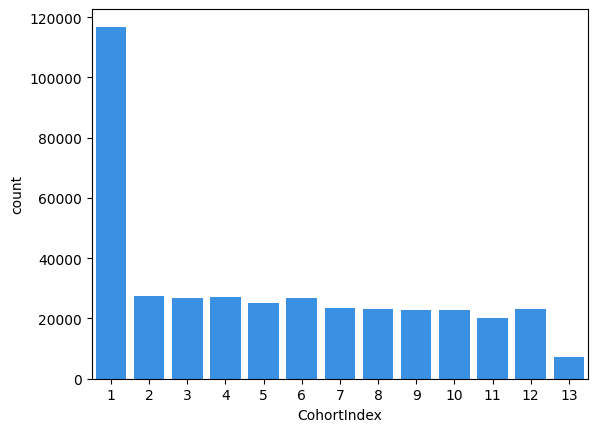

In [108]:
# CohortIndex 시각화(Countplot)
sns.countplot(data=df_valid, x='CohortIndex', color='dodgerblue');

첫 번째 구매 후 다음 구매량이 급격하게 줄어든다.

어떠한 일이 있었는지 주의깊게 볼 필요가 있다.

또한 두 번째 달에 구매율을 높이면 전체적으로 구매율이 높아지지 않을까.

### 잔존 빈도 구하기


In [109]:
# InvoiceDateFirst 에서 연도와 월 추출
df_valid['InvoiceDateFirstYM'] = df_valid['InvoiceDateFirst'].astype(str).str[:7]
df_valid['InvoiceDateFirstYM'].head()

0    2010-12
1    2010-12
2    2010-12
3    2010-12
4    2010-12
Name: InvoiceDateFirstYM, dtype: object

In [110]:
# InvoiceDateFirstYM, CohortIndex 로 그룹화 하여 CustomerID의 유일값에 대한 빈도수 구함.
cohort_count = df_valid.groupby(['InvoiceDateFirstYM', 'CohortIndex'])['CustomerID'].nunique().unstack()
cohort_count
# unstack() : 마지막 Index을 Column 으로 올려줌.

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
InvoiceDateFirstYM,,,,,,,,,,,,,
2010-12,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2011-02,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
2011-03,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
2011-06,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


중복을 제거하고 첫 구매자와 다음 달 잔존하는 구매자를 확인할 수 있다.

CohortIndex = 1 은 신규 유치한 고객임을 알 수 있다.

In [111]:
# # Colormap 커스텀 그냥 알아두기용..
# from matplotlib.colors import ListedColormap
# from matplotlib.colors import LinearSegmentedColormap
# colors = ["white", "#7FFF00", "#32CD32", "#00FA9A", "#00FF7F"]
# MediumSpringGreen = LinearSegmentedColormap.from_list("custom_cmap", colors)

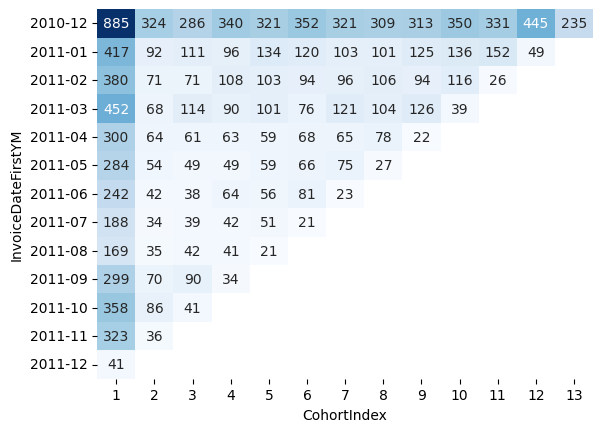

In [112]:
# 잔존 고객 시각화(Heatmap)
sns.heatmap(cohort_count, cmap='Blues', annot=True, fmt=',.0f', cbar=False);

### 월별 신규 유입 고객수(Acquistion)

**Acqusition 이란, 회사의 입장에서 고객이 생기는 것.**

**고객 획득 비용(CAC, Customer Acquistion Cost)**
> 고객 흭득 비용이란, 한 명의 고객을 흭득하기 위해 지출되는 비용을 뜻하는 지표이다. 예를 들어, OR이라는 기업이 광고에 100만원을 투입하여 1,000명의 고객을 획득했다고 가정했다. OR 기업은 1명의 고객을 획득하는데 1,000원을 쓴 것이니 CAC는 1,000원이라고 한다.

**일간/월간 활성 유저(DAU/MAU(Monthly Active User))**
> 특정 기간 동안 서비스를 이용한 순수 이용자를 뜻한다. OR 기업의 고객은 총 3명이 있고 11월 한 달 동안 1번 유저는 3번, 2번은 30번, 3번은 방문하지 않았다고 가정할 때, 11월에 방문산 순수 이용자는 2명이고 11월 MAU는 2명 이라고 한다.

In [113]:
cohort_count[1]

InvoiceDateFirstYM
2010-12    885.0
2011-01    417.0
2011-02    380.0
2011-03    452.0
2011-04    300.0
2011-05    284.0
2011-06    242.0
2011-07    188.0
2011-08    169.0
2011-09    299.0
2011-10    358.0
2011-11    323.0
2011-12     41.0
Name: 1, dtype: float64

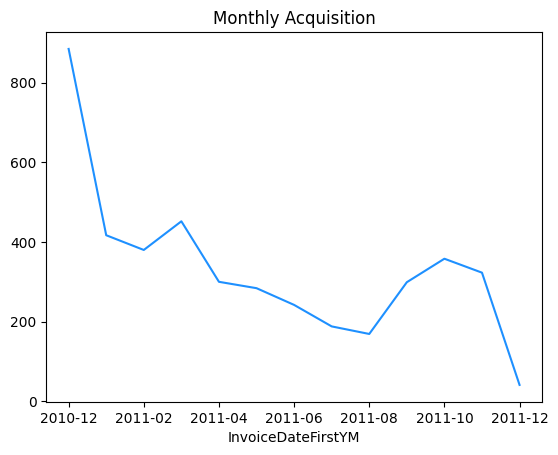

In [114]:
# Monthly Acquisition(plot)
cohort_count[1].plot(title='Monthly Acquisition', color='dodgerblue');

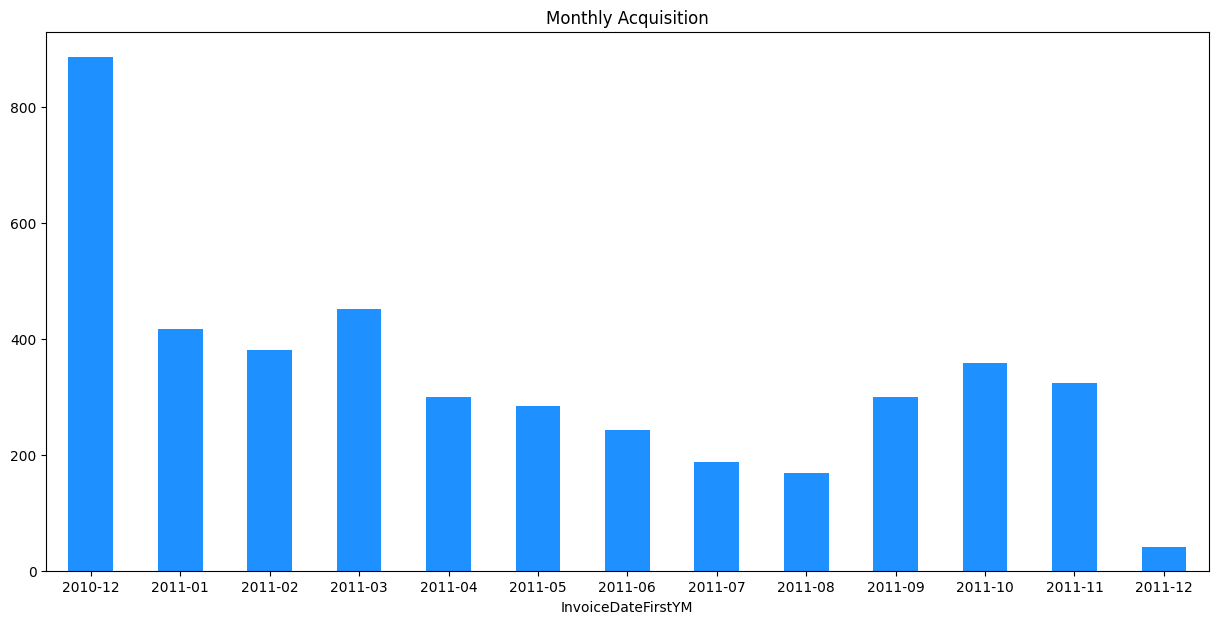

In [115]:
# Monthly Acquisition(bar plot)
plt.figure(figsize=(15,7))
cohort_count[1].plot(kind='bar', title='Monthly Acquisition', color='dodgerblue', rot=0);

### 잔존율

In [116]:
# 가입한 달을 1로 나누면 잔존율.
# div를 통해 구하고 axis=0으로 설정하면 첫 달을 기준을 나머지 달을 나누게 된다.
cohort_norm = cohort_count.div(cohort_count[1], axis=0)
cohort_norm

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
InvoiceDateFirstYM,,,,,,,,,,,,,
2010-12,1.0,0.366102,0.323164,0.384181,0.362712,0.397740,0.362712,0.349153,0.353672,0.395480,0.374011,0.502825,0.265537
2011-01,1.0,0.220624,0.266187,0.230216,0.321343,0.287770,0.247002,0.242206,0.299760,0.326139,0.364508,0.117506,NaN
2011-02,1.0,0.186842,0.186842,0.284211,0.271053,0.247368,0.252632,0.278947,0.247368,0.305263,0.068421,NaN,NaN
2011-03,1.0,0.150442,0.252212,0.199115,0.223451,0.168142,0.267699,0.230088,0.278761,0.086283,NaN,NaN,NaN
2011-04,1.0,0.213333,0.203333,0.210000,0.196667,0.226667,0.216667,0.260000,0.073333,NaN,NaN,NaN,NaN
2011-05,1.0,0.190141,0.172535,0.172535,0.207746,0.232394,0.264085,0.095070,NaN,NaN,NaN,NaN,NaN
2011-06,1.0,0.173554,0.157025,0.264463,0.231405,0.334711,0.095041,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,1.0,0.180851,0.207447,0.223404,0.271277,0.111702,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,1.0,0.207101,0.248521,0.242604,0.124260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


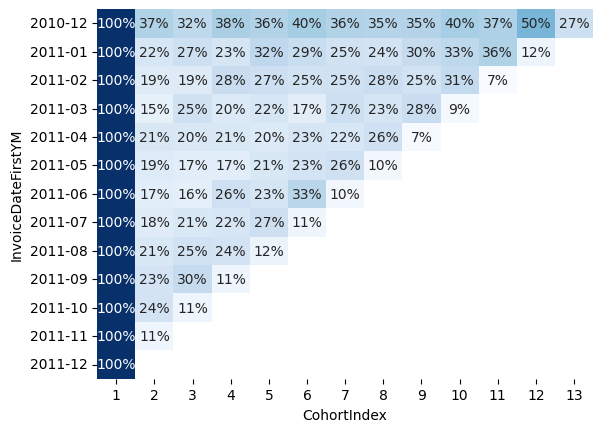

In [117]:
# 잔존율 시각화(heatmap)
sns.heatmap(cohort_norm, cmap='Blues', annot=True, fmt=',.0%', cbar=False);

### 고객별 매출액

In [118]:
# 월별 매출 리텐션
cohort_total_price = df_valid.groupby(['InvoiceDateFirstYM', 'CohortIndex'])['TotalPrice'].sum().unstack()
cohort_total_price

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
InvoiceDateFirstYM,,,,,,,,,,,,,
2010-12,570422.730,275734.47,233390.47,302367.44,204034.38,336113.69,313668.16,310304.03,331001.070,471792.13,455478.90,512341.08,185360.97
2011-01,292366.840,54993.86,63157.01,71526.09,80989.77,84464.57,70073.35,72503.42,71870.481,111370.70,123252.86,26388.03,NaN
2011-02,157700.590,28937.64,40964.47,48155.39,40089.17,34155.67,49673.71,62292.80,55241.340,64688.86,10600.22,NaN,NaN
2011-03,199619.670,30040.34,58958.41,42739.08,51392.44,39962.33,64824.15,70523.62,70847.620,12761.10,NaN,NaN,NaN
2011-04,121809.051,29398.59,25028.57,24282.79,26253.16,30103.24,28505.90,34009.61,6332.000,NaN,NaN,NaN,NaN
2011-05,123739.300,18641.70,20155.73,19162.17,27752.62,32875.34,33168.34,179184.23,NaN,NaN,NaN,NaN,NaN
2011-06,135414.800,14738.49,14104.37,30898.56,26669.90,42531.09,8143.22,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,73860.401,11789.67,15488.37,17391.93,19156.82,6040.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,79601.140,20933.76,35458.48,44487.65,15284.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


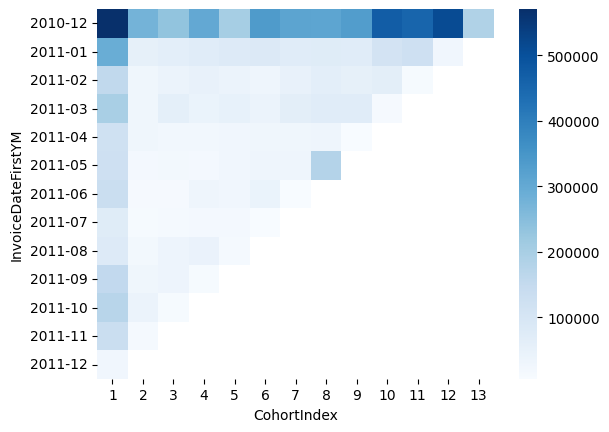

In [119]:
# 월별 매출 리텐션 시각화
sns.heatmap(cohort_total_price, cmap='Blues');

먼저 10년도 12월에 첫 구매 고객들이 9,10,11개월 차에도 많은 구매를 해주었다.(충성고객)

특이한 점은 11년도 5월 코호트가 7개월 차에 유독 많은 매출이 보인다. 이벤트나 프로모션을 진행했을 가능성이 크다.